<a href="https://colab.research.google.com/github/feliperodighero/Machine-Learning-Study/blob/main/EngAtributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
df = pd.read_csv('credit_simple.csv', sep=';')

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,CLASSE
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv,bom
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv,ruim
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação,bom
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento,bom
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo,ruim


In [7]:
X = df.iloc[:, :-1]
y = df['CLASSE']

In [9]:
X.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO
0,1169.0,4,67,nenhum,01/01/2019,masculino solteiro,radio/tv
1,5951.0,2,22,nenhum,01/01/2020,fem div/cas,radio/tv
2,2096.0,3,49,nenhum,02/01/2020,masculino solteiro,educação
3,7882.0,4,45,nenhum,02/01/2019,masculino solteiro,mobilia/equipamento
4,4870.0,4,53,nenhum,03/01/2018,masculino solteiro,carro novo


In [10]:
X.isnull().sum()

,0
SALDO_ATUAL,7
RESIDENCIADESDE,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
ESTADOCIVIL,8
PROPOSITO,0


In [11]:
mediana = X['SALDO_ATUAL'].median()
mediana

2323.0

In [12]:
X['SALDO_ATUAL'].fillna(mediana, inplace=True)

In [13]:
X.isnull().sum()

,0
SALDO_ATUAL,0
RESIDENCIADESDE,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
ESTADOCIVIL,8
PROPOSITO,0


In [14]:
agrupado = X.groupby(['ESTADOCIVIL']).size()
agrupado

,0
ESTADOCIVIL,
fem div/cas,308
masculino casado/viuvo,92
masculino div/sep,50
masculino solteiro,542


In [15]:
X['ESTADOCIVIL'].fillna('masculino solteiro', inplace=True)

In [16]:
X.isnull().sum()

,0
SALDO_ATUAL,0
RESIDENCIADESDE,0
IDADE,0
OUTROSPLANOSPGTO,0
DATA,0
ESTADOCIVIL,0
PROPOSITO,0


In [19]:
sns.set_style('whitegrid')

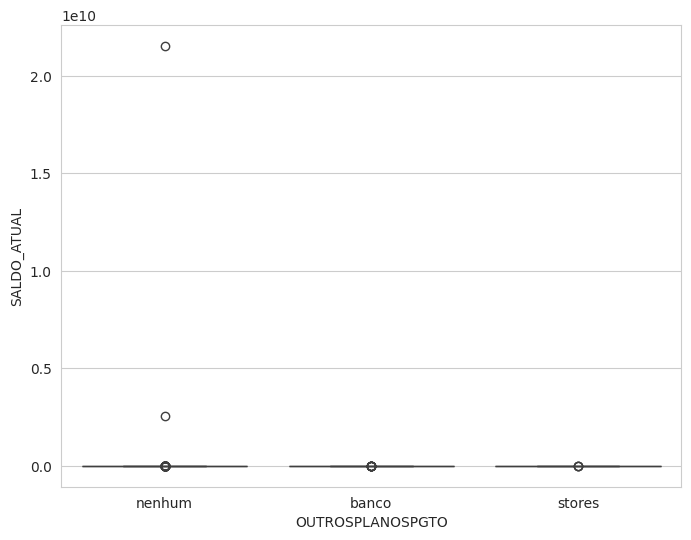

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X.OUTROSPLANOSPGTO, y=X.SALDO_ATUAL);

In [25]:
desv = X['SALDO_ATUAL'].std()
desv

685936688.9820067

In [28]:
X.loc[X['SALDO_ATUAL'] >= 2 * desv, 'SALDO_ATUAL']

,SALDO_ATUAL
127,2.541111e+09
160,2.154441e+10


In [29]:
median = X['SALDO_ATUAL'].median()
median

2323.0

In [30]:
X.loc[X['SALDO_ATUAL'] >= 2 * desv, 'SALDO_ATUAL'] = median

In [33]:
X.loc[X['SALDO_ATUAL'] >= 2 * desv, 'SALDO_ATUAL']

,SALDO_ATUAL


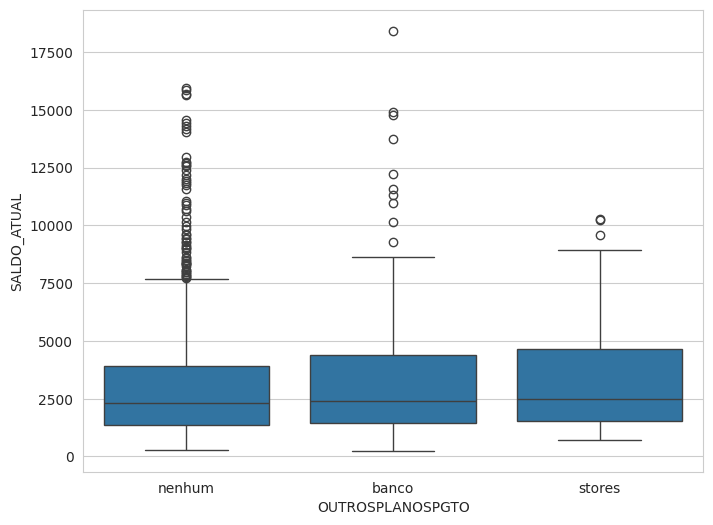

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=X.OUTROSPLANOSPGTO, y=X.SALDO_ATUAL);

In [36]:
agroup = X.groupby(['PROPOSITO']).size()
agroup

,0
PROPOSITO,
Eletrodomésticos,12
carro novo,234
carro usado,103
educação,50
mobilia/equipamento,181
negócios,97
obras,22
outros,12
qualificação,9


In [37]:
X.loc[X['PROPOSITO'] == 'Eletrodomésticos', 'PROPOSITO'] = 'outros'
X.loc[X['PROPOSITO'] == 'qualificação', 'PROPOSITO'] = 'outros'
agroup = X.groupby(['PROPOSITO']).size()
agroup

,0
PROPOSITO,
carro novo,234
carro usado,103
educação,50
mobilia/equipamento,181
negócios,97
obras,22
outros,33
radio/tv,280


In [38]:
X['DATA']

,DATA
0,01/01/2019
1,01/01/2020
2,02/01/2020
3,02/01/2019
4,03/01/2018
...,...
995,29/06/2018
996,30/06/2018
997,03/07/2018
998,04/07/2019


In [41]:
X['DATA'] = pd.to_datetime(X['DATA'], format='%d/%m/%Y')

In [43]:
X['DATA']

,DATA
0,2019-01-01
1,2020-01-01
2,2020-01-02
3,2019-01-02
4,2018-01-03
...,...
995,2018-06-29
996,2018-06-30
997,2018-07-03
998,2019-07-04


In [46]:
X['ANO'] = X['DATA'].dt.year
X['MES'] = X['DATA'].dt.month
X['DIASEMANA'] = X['DATA'].dt.day_name()

In [49]:
X

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,ANO,MES,DIASEMANA
0,1169.0,4,67,nenhum,2019-01-01,masculino solteiro,radio/tv,2019,1,Tuesday
1,5951.0,2,22,nenhum,2020-01-01,fem div/cas,radio/tv,2020,1,Wednesday
2,2096.0,3,49,nenhum,2020-01-02,masculino solteiro,educação,2020,1,Thursday
3,7882.0,4,45,nenhum,2019-01-02,masculino solteiro,mobilia/equipamento,2019,1,Wednesday
4,4870.0,4,53,nenhum,2018-01-03,masculino solteiro,carro novo,2018,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...
995,1736.0,4,31,nenhum,2018-06-29,fem div/cas,mobilia/equipamento,2018,6,Friday
996,3857.0,4,40,nenhum,2018-06-30,masculino div/sep,carro usado,2018,6,Saturday
997,804.0,4,38,nenhum,2018-07-03,masculino solteiro,radio/tv,2018,7,Tuesday
998,1845.0,4,23,nenhum,2019-07-04,masculino solteiro,radio/tv,2019,7,Thursday


In [50]:
X['ESTADOCIVIL'].unique()

array(['masculino solteiro', 'fem div/cas', 'masculino div/sep',
       'masculino casado/viuvo'], dtype=object)

In [51]:
X['PROPOSITO'].unique()

array(['radio/tv', 'educação', 'mobilia/equipamento', 'carro novo',
       'carro usado', 'negócios', 'outros', 'obras'], dtype=object)

In [52]:
X['DIASEMANA'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday', 'Monday',
       'Friday'], dtype=object)

In [54]:
labelencoder = LabelEncoder()

X['ESTADOCIVIL'] = labelencoder.fit_transform(X['ESTADOCIVIL'])
X['PROPOSITO'] = labelencoder.fit_transform(X['PROPOSITO'])
X['DIASEMANA'] = labelencoder.fit_transform(X['DIASEMANA'])

In [56]:
X.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,ANO,MES,DIASEMANA
0,1169.0,4,67,nenhum,2019-01-01,3,7,2019,1,5
1,5951.0,2,22,nenhum,2020-01-01,0,7,2020,1,6
2,2096.0,3,49,nenhum,2020-01-02,3,2,2020,1,4
3,7882.0,4,45,nenhum,2019-01-02,3,3,2019,1,6
4,4870.0,4,53,nenhum,2018-01-03,3,0,2018,1,6


In [57]:
outros = X['OUTROSPLANOSPGTO'].unique()
outros

array(['nenhum', 'banco', 'stores'], dtype=object)

In [59]:
z = pd.get_dummies(X['OUTROSPLANOSPGTO'], prefix = 'OUTROS')
z

,OUTROS_banco,OUTROS_nenhum,OUTROS_stores
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
995,False,True,False
996,False,True,False
997,False,True,False
998,False,True,False


In [60]:
X

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,ANO,MES,DIASEMANA
0,1169.0,4,67,nenhum,2019-01-01,3,7,2019,1,5
1,5951.0,2,22,nenhum,2020-01-01,0,7,2020,1,6
2,2096.0,3,49,nenhum,2020-01-02,3,2,2020,1,4
3,7882.0,4,45,nenhum,2019-01-02,3,3,2019,1,6
4,4870.0,4,53,nenhum,2018-01-03,3,0,2018,1,6
...,...,...,...,...,...,...,...,...,...,...
995,1736.0,4,31,nenhum,2018-06-29,0,3,2018,6,0
996,3857.0,4,40,nenhum,2018-06-30,2,1,2018,6,2
997,804.0,4,38,nenhum,2018-07-03,3,7,2018,7,5
998,1845.0,4,23,nenhum,2019-07-04,3,7,2019,7,4


In [61]:
sc = StandardScaler()
m = sc.fit_transform(X.iloc[:, 0:3])
m

array([[-0.74551643,  1.04698668,  1.6392759 ],
       [ 0.95774038, -0.76597727, -0.74024139],
       [-0.41533679,  0.14050471,  0.68746898],
       ...,
       [-0.87552244,  1.04698668,  0.1058092 ],
       [-0.50473818,  1.04698668, -0.68736323],
       [ 0.46799171,  1.04698668, -0.47585058]])

In [64]:
X = pd.concat([X, z, pd.DataFrame(m, columns=[['SALDO_ATUAL_N', 'RESIDENCIA_N', 'IDADE_N']])], axis=1)

In [65]:
X.head()

,SALDO_ATUAL,RESIDENCIADESDE,IDADE,OUTROSPLANOSPGTO,DATA,ESTADOCIVIL,PROPOSITO,ANO,MES,DIASEMANA,...,OUTROS_stores,"(SALDO_ATUAL_N,)","(RESIDENCIA_N,)","(IDADE_N,)",OUTROS_banco,OUTROS_nenhum,OUTROS_stores,"(SALDO_ATUAL_N,)","(RESIDENCIA_N,)","(IDADE_N,)"
0,1169.0,4.0,67.0,nenhum,2019-01-01,3.0,7.0,2019.0,1.0,5.0,...,NaN,NaN,NaN,NaN,False,True,False,-0.745516,1.046987,1.639276
1,5951.0,2.0,22.0,nenhum,2020-01-01,0.0,7.0,2020.0,1.0,6.0,...,NaN,NaN,NaN,NaN,False,True,False,0.957740,-0.765977,-0.740241
2,2096.0,3.0,49.0,nenhum,2020-01-02,3.0,2.0,2020.0,1.0,4.0,...,NaN,NaN,NaN,NaN,False,True,False,-0.415337,0.140505,0.687469
3,7882.0,4.0,45.0,nenhum,2019-01-02,3.0,3.0,2019.0,1.0,6.0,...,NaN,NaN,NaN,NaN,False,True,False,1.645526,1.046987,0.475956
4,4870.0,4.0,53.0,nenhum,2018-01-03,3.0,0.0,2018.0,1.0,6.0,...,NaN,NaN,NaN,NaN,False,True,False,0.572709,1.046987,0.898982
